In [1]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine
# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')
# Import module for k-protoype cluster
from kmodes.kmodes import KModes

import seaborn as sns

In [2]:
import pandas as pd

df = pd.read_csv('cleaned_1015.csv', usecols = ['DECADE_RELEASED', 'MAIN_GENRE'])

df

,DECADE_RELEASED,MAIN_GENRE
0,2000s,Action
1,2010s,Adventure
2,2020s,Science Fiction
3,1990s,Drama
4,2010s,Adventure
...,...,...
6966,1970s,Comedy
6967,Before 1960s,Crime
6968,1960s,Comedy
6969,Before 1960s,Comedy


In [3]:
df = df.dropna(subset=['MAIN_GENRE'])

df.isnull().sum()

DECADE_RELEASED    0
MAIN_GENRE         0
dtype: int64

In [4]:
# Convert dataframe to matrix
df_kmods = df.to_numpy()

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


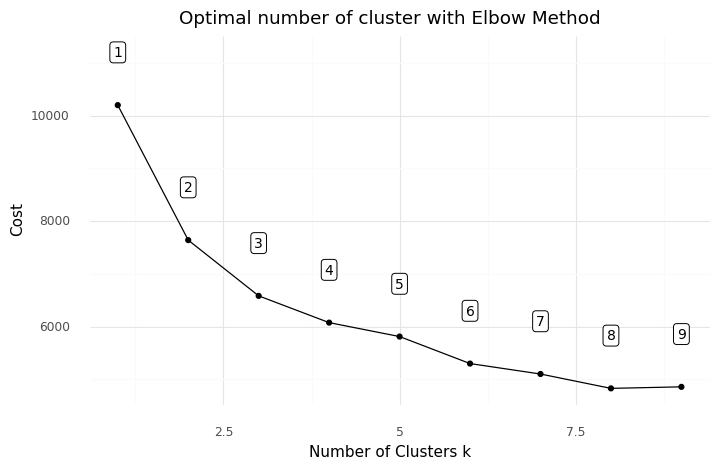

<ggplot: (8784025652585)>

In [5]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(df_kmods)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

Based on the elbow method, we deduce that k=3 is the optimal k based on the elbow method, as it optimises cost and number of clusters.

In [6]:
# Fit the cluster
kmodes = KModes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
cluster_labels = kmodes.fit_predict(df_kmods)
df["Cluster"] = cluster_labels

df
df.to_csv('kmodes_cluster.csv')

/var/folders/18/95745h4n0hl94h03fr01c1jc0000gn/T/ipykernel_18270/3325755434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [44]:
# Cluster centorid
kmodes.cluster_centroids_

array([['1990s', 'Action'],
       ['2000s', 'Comedy'],
       ['2010s', 'Drama']], dtype='<U6')

In [15]:
# Check the iteration of the clusters created
kmodes.n_iter_

1

In [16]:
# Check the cost of the clusters created
kmodes.cost_

1719.0

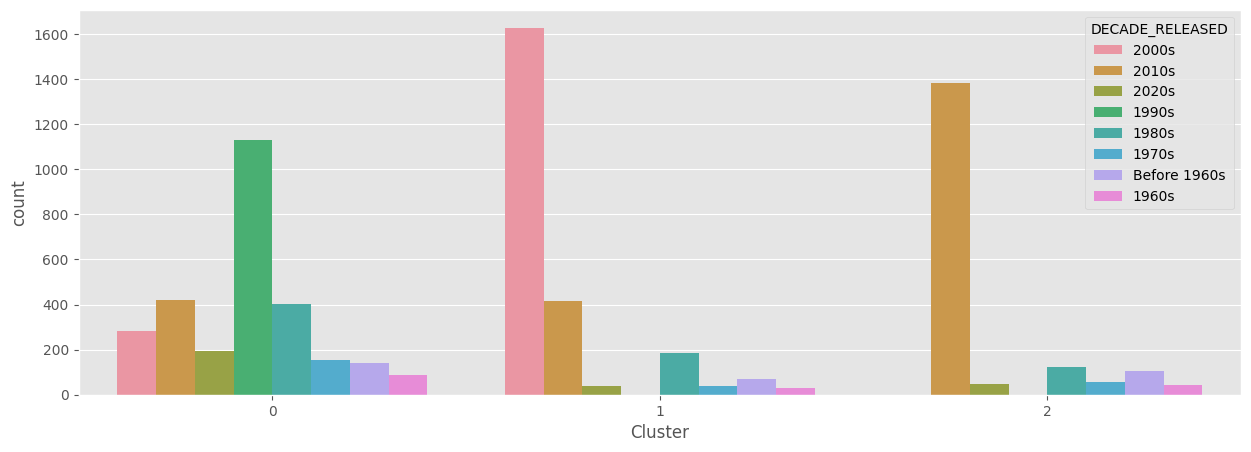

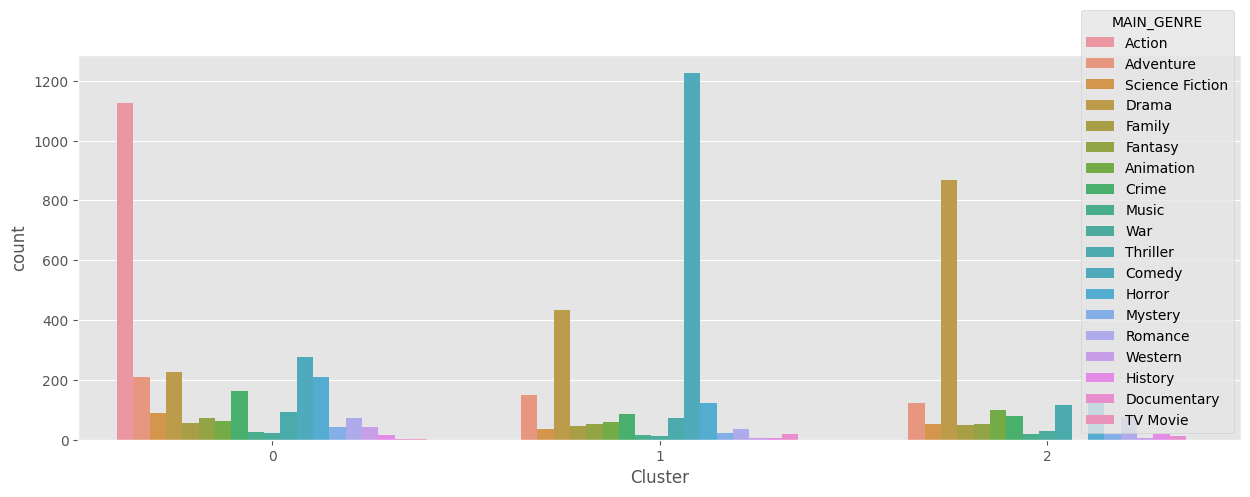

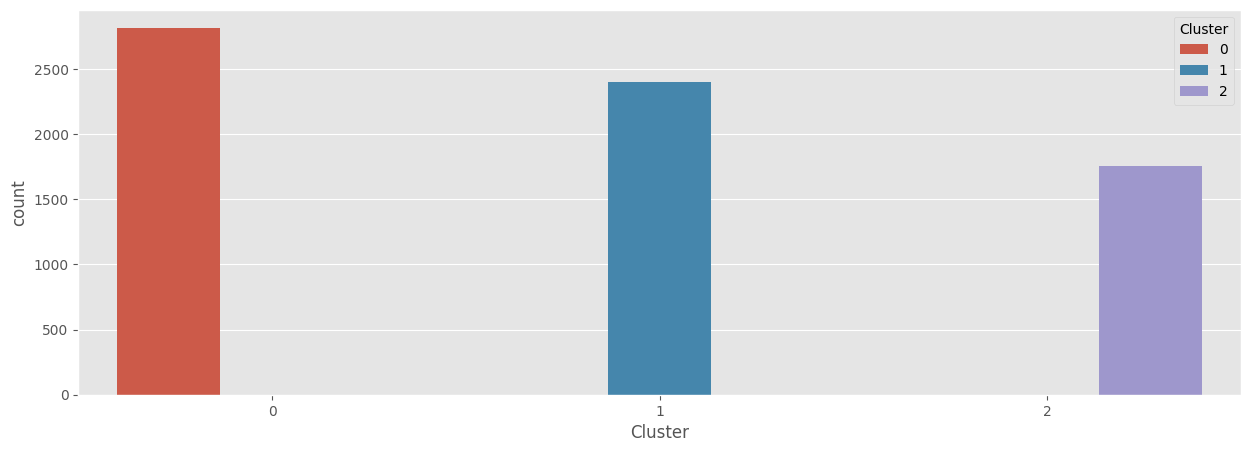

In [57]:
for col in df:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = df)
    plt.show()

Based on the first feature of decade released, we can identify that they have been roughly clustered by the time period the movie was released in. Cluster 0 contains movies in the 1990s, while Cluster 1 mainly contained those in the 2000s, and Cluster 2 for movies in the 2010s. Based on the second feature, we can hence also draw observations where Action films were more popular in older films (Cluster 0), while Thriller films got popular only in the 2000s (Cluster 1). Drama films got increasingly popular across the period, from Cluster 0 to 2, and reached its peak in the 2010s (Cluster 2).

We can therefore see the clear trends in how movie themes have shifted through the time periods.